#**SLIDING WINDOW**

Las operaciones para realizar la extracción de características de una imágenes son:



1.   Filtrado con la capa convolucional
2.   Detección con la capa de activación ReLU
3.   Agrupación con la capa maximum pooling



La convolución y el pooling comparten una característica: se ejecutan sobre una sliding window. Esta ventana está dada por las dimensiones del kernel, el parámetro `kernel_size` y en el pooling con `pool_size`.

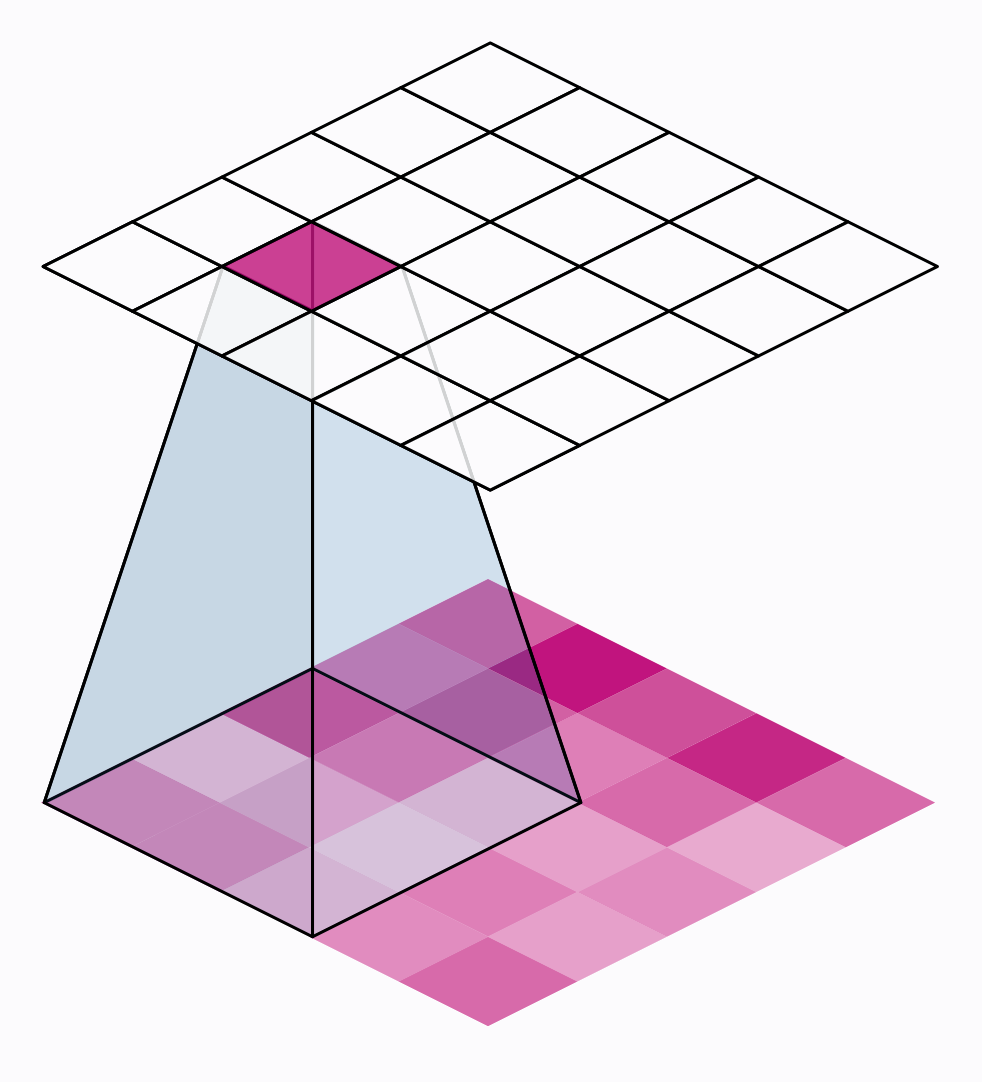

Hay otros dos parámetros que afectan las capas convolución y pooling:

* strides, cuánto debe moverse una ventana en cada paso
* padding, cómo manejar los pixeles en las esquinas de la entrada

Así, las capas se definen como:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation='relu'),
    layers.MaxPool2D(pool_size=2,
                     strides=1,
                     padding='same')
    # Otras capas
])

##Stride

Distancia que la ventana se mueve en cada paso. Se necesita especificar en las dos dimensiones de la imagen: una para el movimiento de izquierda a derecha y otra de arriba a abajo. A continuación strides=(2,2), un movimiento de 2 pixeles en cada paso

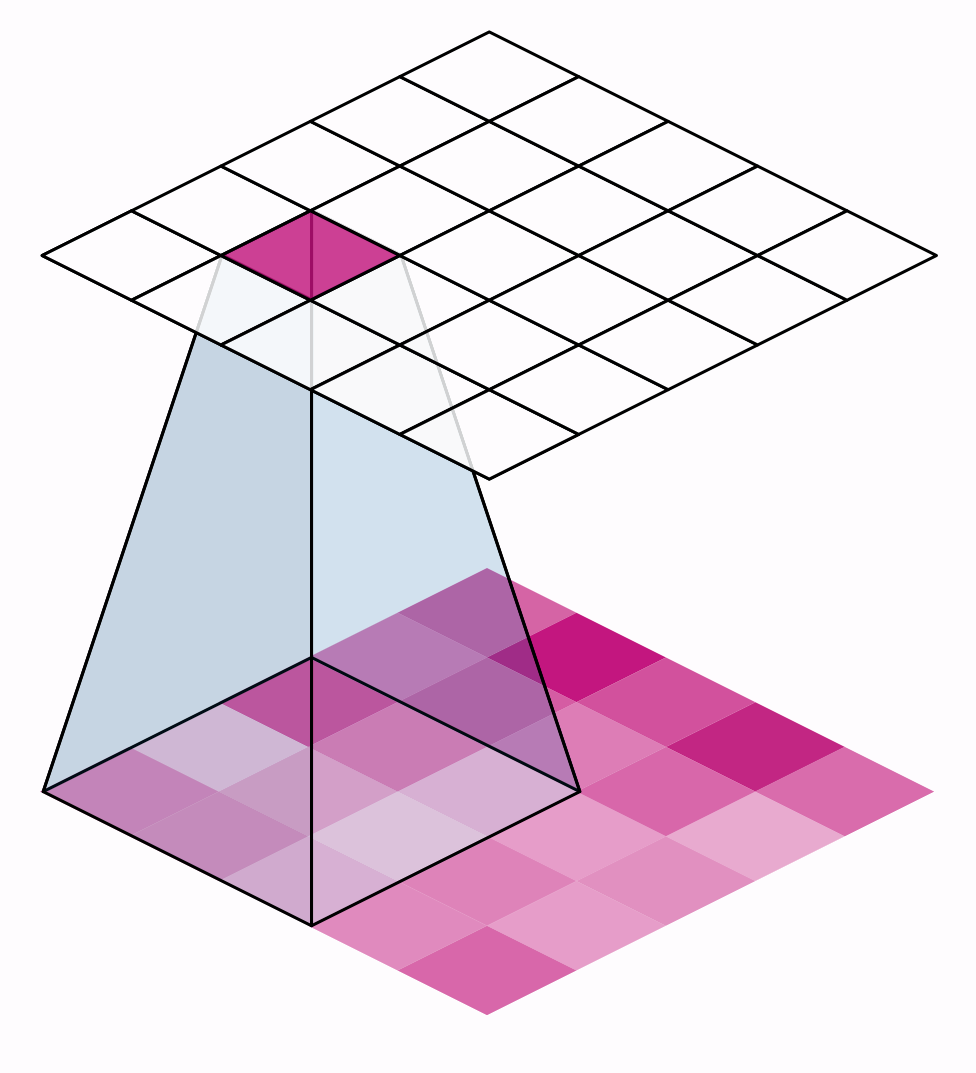

Si el stride en ambas direcciones es mayor que 1, la sliding window no considerará algunos pixeles de la entrada. Sin embargo, las capas maximum pooling por lo general tienen valores de stride mayores que uno, como (2,2) o (3,3), pero no más grandes que la ventana.

Cuando el valor de los strides es el mismo en ambas direcciones, se puede abreviar, strides = (2,2) se usa como strides = 2

##Padding

¿Qué se hace con los límites de la entrada? Dado que no se trata a todos los pixeles de la misma manera.

Lo que hace la convolución con estos valores límite está determinado por el parámetro de relleno (padding). En TensorFlow se tienen dos opciones: `padding = 'same'` o `padding = 'valid'`. 

Con `padding = 'valid'`, la ventana de convolución permanecerá completamente dentro de la entrada, el problema es que la salida se reduce (pierde pixeles) lo que limita la cantidad de capas, sobretodo con entradas pequeñas.

Con `padding = 'same'` , se rellena la entrada con ceros alrededor del borde, para hacer que el tamaño de la salida sea el mismo que el tamaño de la entrada. Esto puede diluir la influencia de los píxeles en los bordes.

La siguiente animación muestra una sliding window con `padding = 'same'`

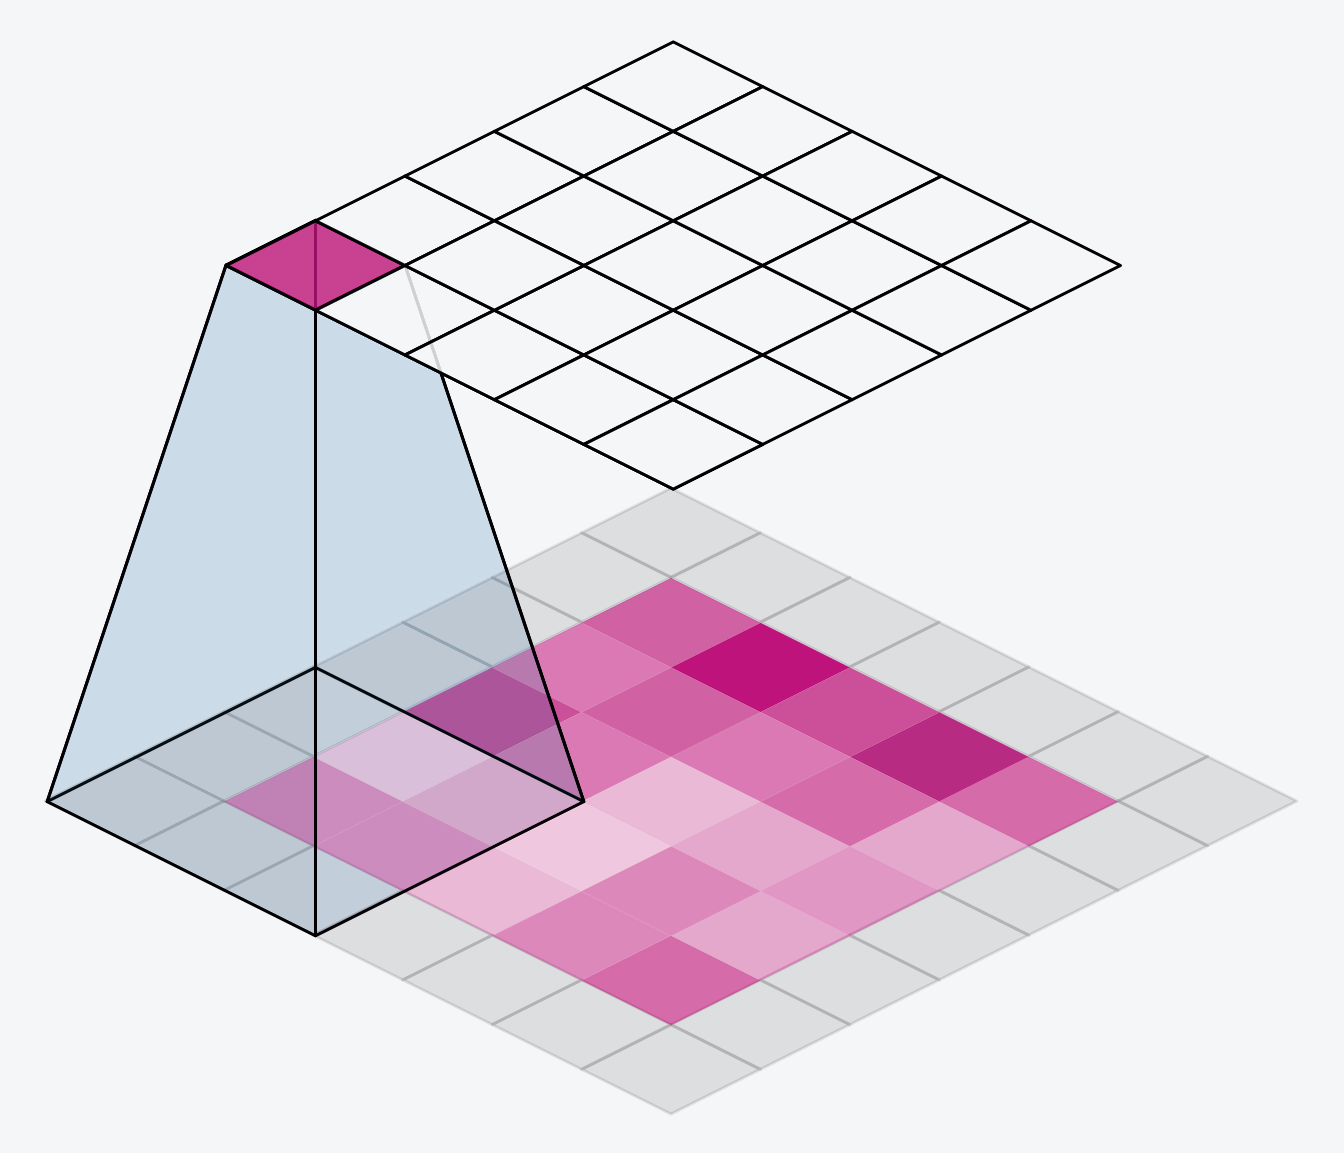

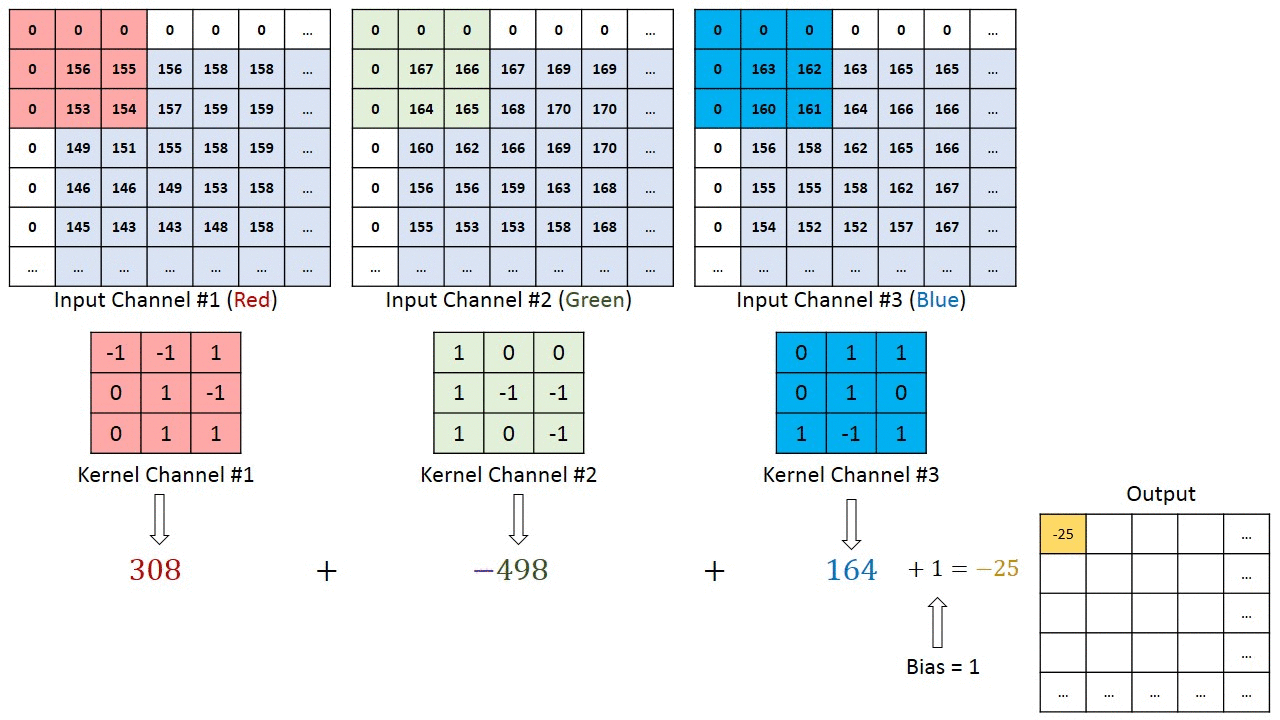

##Ejemplo - Sliding Windows

Considere el siguiente kernel:

[-1 -2 -1] <p>
[ 0  0  0] <p>
[ 1  2  1] <p>

Con una arquitectura VGG, convolución con los siguientes parámetros de un círculo:

    conv_stride=1,
    pool_size=2,
    pool_stride=2,

Trabaja bien, detectando líneas horizontales 

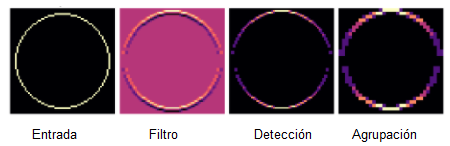

Qué pasa si se cambia a:

    conv_stride=3,
    pool_size=2,
    pool_stride=2,

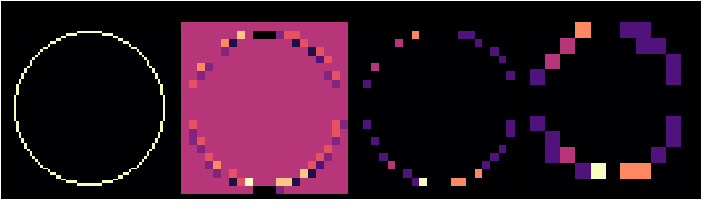

donde se reduce la calidad de las características extraidas, los strides = 3 hacen muy 

##Ejercicio

Lea una imágen, aplique diferentes kernels y experimente con distintos parámetros.

    kernels = [(edge, "edge"), (blur, "blur"), (bottom_sobel, "bottom_sobel"),
               (emboss, "emboss"), (sharpen, "sharpen")]
    conv_stride=1,
    conv_padding='valid',
    pool_size=2,
    pool_stride=2,
    pool_padding='valid',